In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(10, 4))

In [3]:
pieces = [df[3:7], df[:3], df[7:]]
pieces

[          0         1         2         3
 3  1.415658  0.850203  1.113855  0.524100
 4  0.465891  0.529354  0.249200 -1.529717
 5  0.395324  0.033405 -0.827162 -1.797366
 6 -0.263947 -1.514597 -1.199846 -0.204261,
           0         1         2         3
 0  0.308017 -0.632751  0.032148 -0.822722
 1  1.611280  0.064870  0.476747  0.364136
 2 -0.189213  0.580306  0.267310 -0.376588,
           0         1         2         3
 7 -1.089585  0.912859  0.531521  0.938269
 8 -1.035732 -0.578431  0.299229 -1.401500
 9 -1.366283  1.003930  0.300709  2.410673]

In [4]:
pd.concat(pieces)

,0,1,2,3
3,1.415658,0.850203,1.113855,0.524100
4,0.465891,0.529354,0.249200,-1.529717
5,0.395324,0.033405,-0.827162,-1.797366
6,-0.263947,-1.514597,-1.199846,-0.204261
0,0.308017,-0.632751,0.032148,-0.822722
1,1.611280,0.064870,0.476747,0.364136
2,-0.189213,0.580306,0.267310,-0.376588
7,-1.089585,0.912859,0.531521,0.938269
8,-1.035732,-0.578431,0.299229,-1.401500
9,-1.366283,1.003930,0.300709,2.410673


In [17]:
rng = pd.date_range('1/1/2012', periods=100, freq='min')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

NameError: name 'pd' is not defined

In [27]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [28]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


# 孤异森林例子

Automatically created module for IPython interactive environment


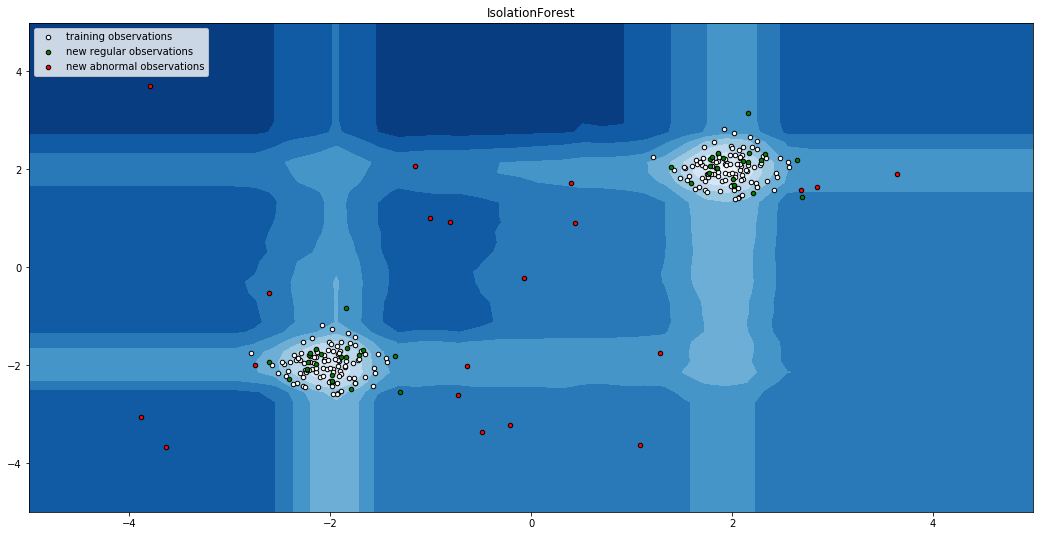

In [16]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18,9
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()